In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
import os

desktop = os.path.join(os.path.join(os.path.expanduser('~')), 'Desktop')
file_path = os.path.join(desktop, 'train.csv')
data = pd.read_csv(file_path)

In [4]:
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [5]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [6]:
data['Reached.on.Time_Y.N'] = data['Reached.on.Time_Y.N'].astype('category')

# Convert 'Gender' to category
data['Gender'] = data['Gender'].astype('category')

# Similarly, convert other categorical variables
categorical_columns = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']
for col in categorical_columns:
    data[col] = data[col].astype('category')

In [7]:
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicates if any
data = data.drop_duplicates()

Number of duplicate rows: 0


In [8]:
 # price categories
data['Price Category'] = pd.cut(data['Cost_of_the_Product'],
                                bins=[0, 100, 500, 1000, np.inf],
                                labels=['Low', 'Medium', 'High', 'Very High'])

In [9]:
data.describe(include='all')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Price Category
count,10999.00000,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.0,10999
unique,NaN,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,2.0,2
top,NaN,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,1.0,Medium
freq,NaN,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,6563.0,10959
mean,5500.00000,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,NaN,NaN
std,3175.28214,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,NaN,NaN
min,1.00000,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,NaN,NaN
25%,2750.50000,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,NaN,NaN
50%,5500.00000,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,NaN,NaN
75%,8249.50000,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,NaN,NaN


In [10]:
data['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

In [11]:
numerical_data = data.select_dtypes(include=[np.number])

# Display the selected numerical columns
print("Numerical Columns:")
print(numerical_data.columns.tolist())

Numerical Columns:
['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']


In [12]:
correlation = numerical_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
                           ID  Customer_care_calls  Customer_rating  \
ID                   1.000000             0.188998        -0.005722   
Customer_care_calls  0.188998             1.000000         0.012209   
Customer_rating     -0.005722             0.012209         1.000000   
Cost_of_the_Product  0.196791             0.323182         0.009270   
Prior_purchases      0.145369             0.180771         0.013179   
Discount_offered    -0.598278            -0.130750        -0.003124   
Weight_in_gms        0.278312            -0.276615        -0.001897   

                     Cost_of_the_Product  Prior_purchases  Discount_offered  \
ID                              0.196791         0.145369         -0.598278   
Customer_care_calls             0.323182         0.180771         -0.130750   
Customer_rating                 0.009270         0.013179         -0.003124   
Cost_of_the_Product             1.000000         0.123676         -0.138312   
Prior_purchases 

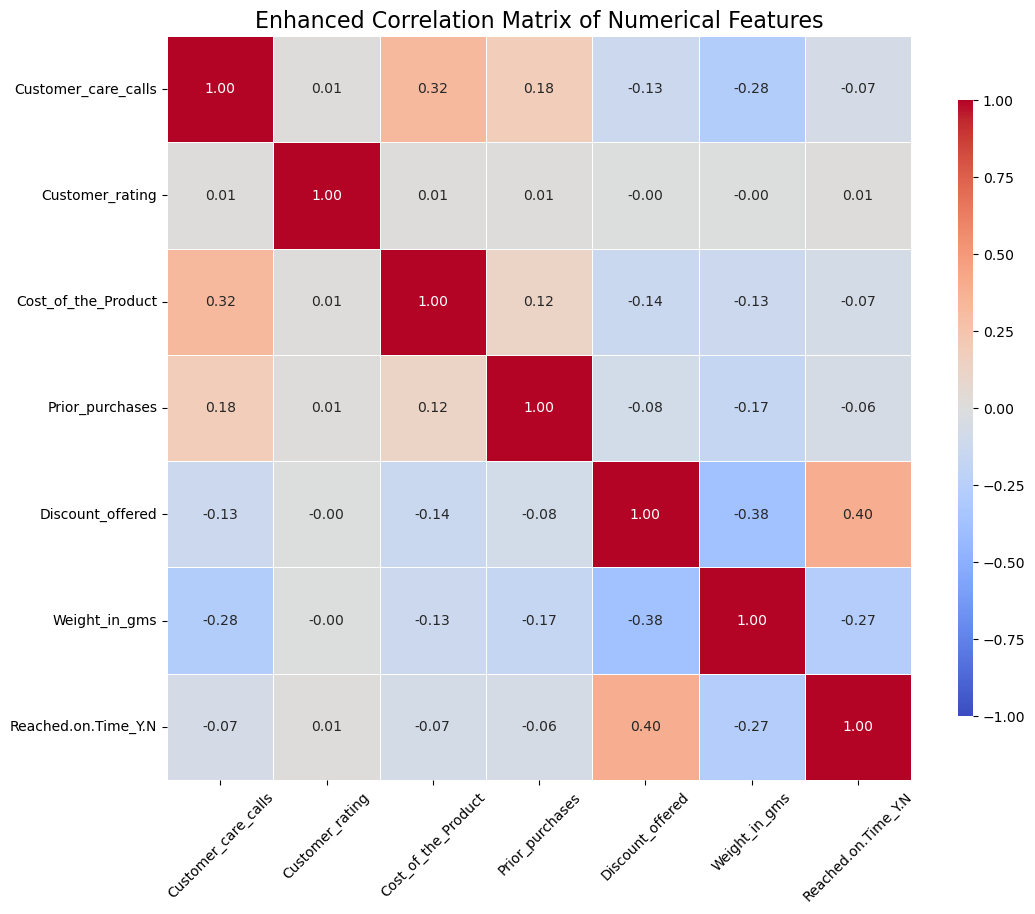

In [13]:
correlation_data = data.drop(['ID'], axis=1)

correlation_data = correlation_data.apply(pd.to_numeric, errors='coerce')

correlation_data = correlation_data.dropna(axis=1, how='any')

correlation_matrix = correlation_data.corr()

correlation_matrix = correlation_matrix.reindex(index=correlation_matrix.columns, columns=correlation_matrix.columns)

plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,  # Add annotations for all cells
    fmt=".2f",  # Format numbers to 2 decimal points
    cmap="coolwarm",  # Diverging colormap
    vmin=-1, vmax=1,  # Symmetrical color scaling
    linewidths=0.5,  # Add subtle grid lines
    square=True,  # Make cells square
    cbar_kws={'shrink': 0.8, 'aspect': 40}  # Shrink color bar for better fit
)

# Add a title to the heatmap
plt.title("Enhanced Correlation Matrix of Numerical Features", fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# Display the heatmap
plt.show()

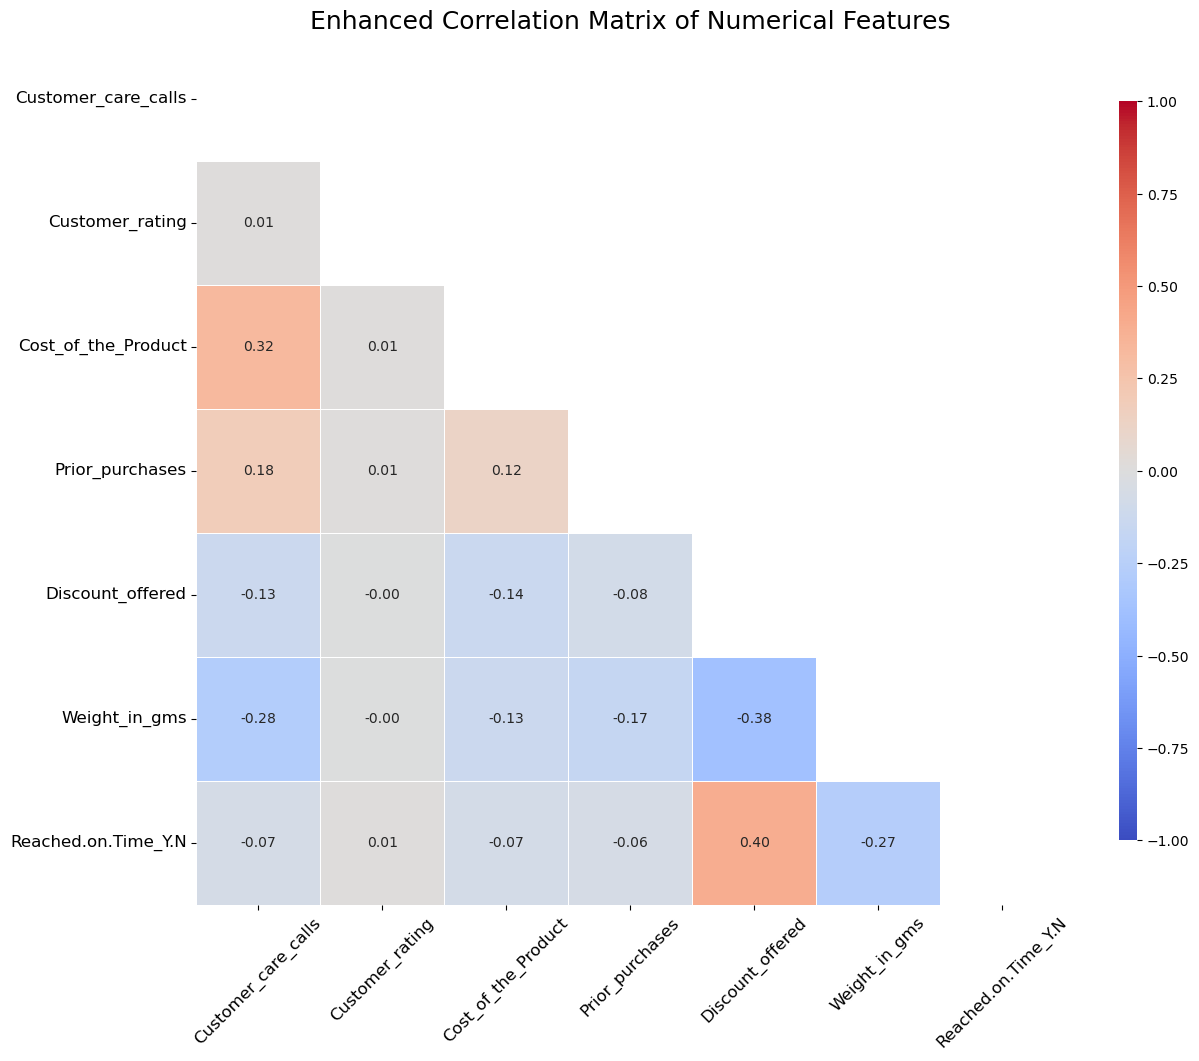

In [14]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(14, 12))

sns.heatmap(
    correlation_matrix,
    annot=True,  # Display correlation coefficients
    fmt=".2f",  # Limit annotations to 2 decimal places
    cmap="coolwarm",  # Diverging color scheme
    vmin=-1, vmax=1,  # Symmetrical color scaling
    linewidths=0.5,  # Subtle grid lines
    square=True,  # Ensure cells are square
    mask=mask,  # Mask the diagonal
    cbar_kws={'shrink': 0.8, 'aspect': 40}  # Adjust color bar
)

plt.title("Enhanced Correlation Matrix of Numerical Features", fontsize=18)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

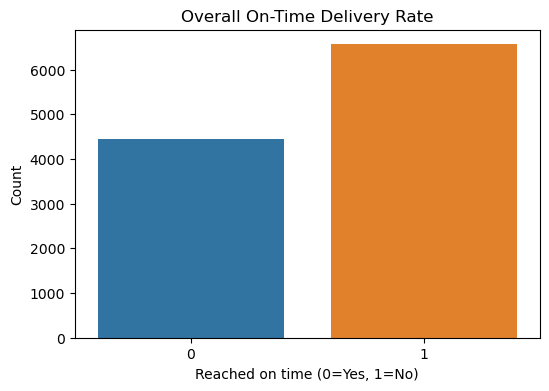

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='Reached.on.Time_Y.N', data=data)
plt.title('Overall On-Time Delivery Rate')
plt.xlabel('Reached on time (0=Yes, 1=No)')
plt.ylabel('Count')
plt.show()

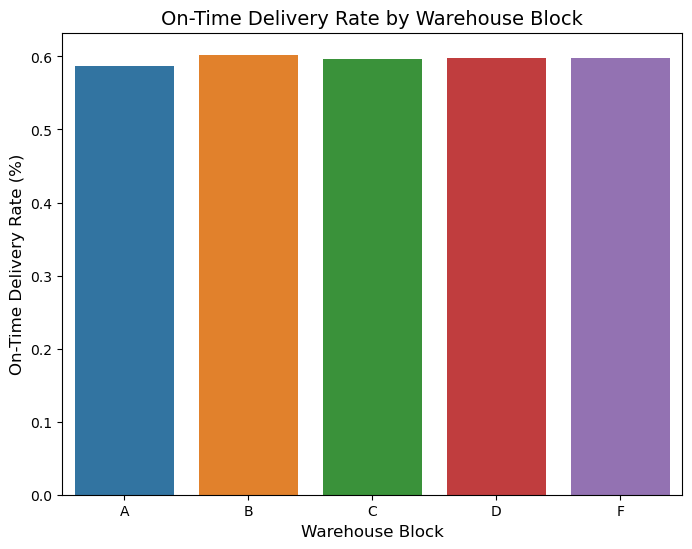

In [16]:
data['Reached.on.Time_Y.N'] = pd.to_numeric(data['Reached.on.Time_Y.N'], errors='coerce')

# Aggregate data to calculate on-time delivery rates by warehouse block
# 'Warehouse_block' remains categorical, but 'Reached.on.Time_Y.N' is aggregated numerically.
avg_data = data.groupby('Warehouse_block')['Reached.on.Time_Y.N'].mean().reset_index()

# Plot the aggregated data
plt.figure(figsize=(8, 6))
sns.barplot(
    x='Warehouse_block',                # Categorical variable: warehouse blocks
    y='Reached.on.Time_Y.N',            # Aggregated on-time delivery rate
    data=avg_data,                      # DataFrame with aggregated data
    errorbar=None                       # Remove error bars
)

# Add titles and labels
plt.title("On-Time Delivery Rate by Warehouse Block", fontsize=14)
plt.xlabel("Warehouse Block", fontsize=12)
plt.ylabel("On-Time Delivery Rate (%)", fontsize=12)

# Display the plot
plt.show()

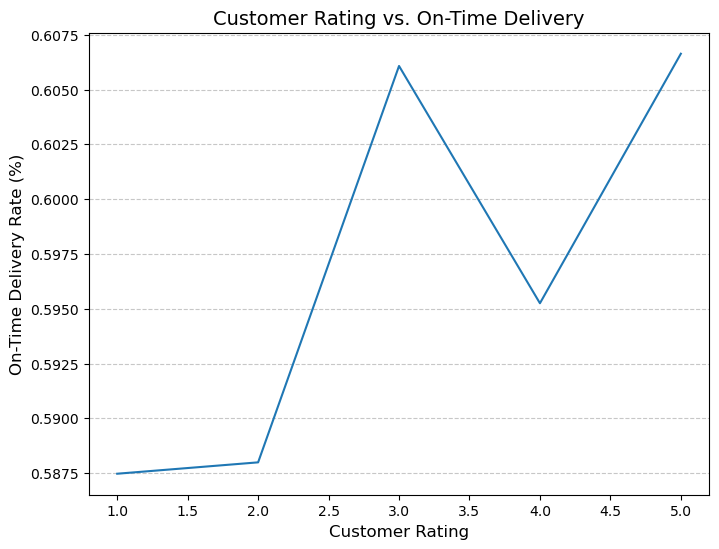

In [17]:
plt.figure(figsize=(8, 6))
sns.lineplot(
    x='Customer_rating', 
    y='Reached.on.Time_Y.N', 
    data=data, 
    errorbar=None
)
plt.title('Customer Rating vs. On-Time Delivery', fontsize=14)
plt.ylabel('On-Time Delivery Rate (%)', fontsize=12)
plt.xlabel('Customer Rating', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add gridlines for clarity
plt.show()

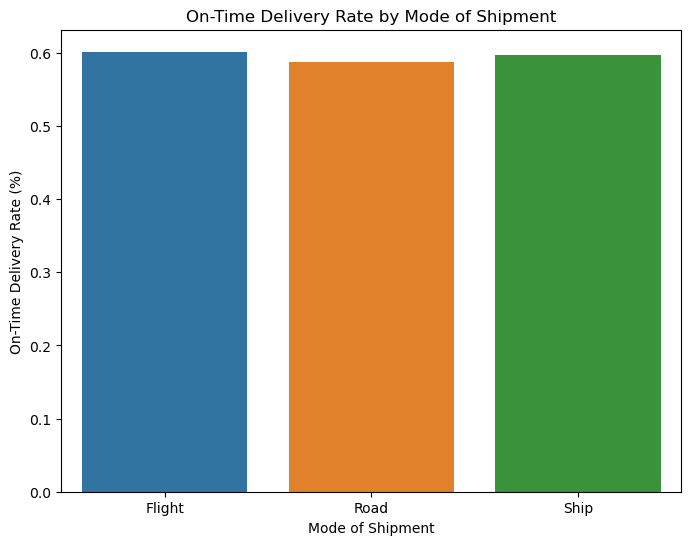

In [18]:
avg_data = data.groupby('Mode_of_Shipment', observed=True)['Reached.on.Time_Y.N'].mean().reset_index()

# Plot the aggregated data
plt.figure(figsize=(8, 6))
sns.barplot(x='Mode_of_Shipment', y='Reached.on.Time_Y.N', data=avg_data, errorbar=None)
plt.title('On-Time Delivery Rate by Mode of Shipment')
plt.ylabel('On-Time Delivery Rate (%)')
plt.xlabel('Mode of Shipment')
plt.show()


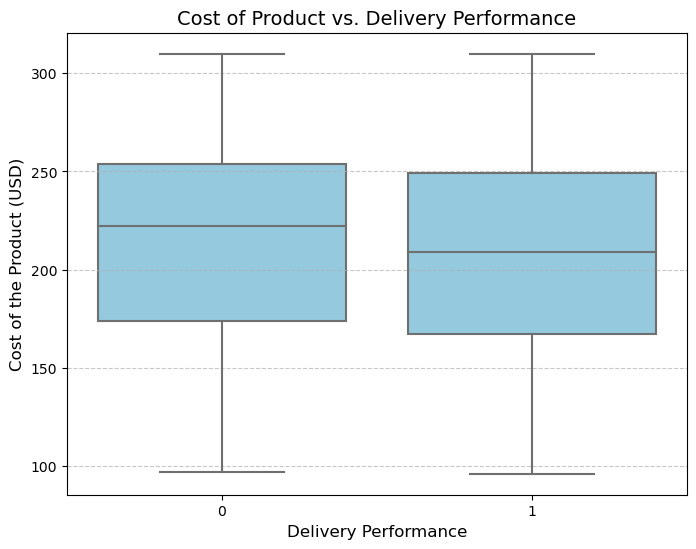

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Reached.on.Time_Y.N', 
    y='Cost_of_the_Product', 
    data=data, 
    color="skyblue"  
)
plt.title('Cost of Product vs. Delivery Performance', fontsize=14)
plt.xlabel('Delivery Performance', fontsize=12)
plt.ylabel('Cost of the Product (USD)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

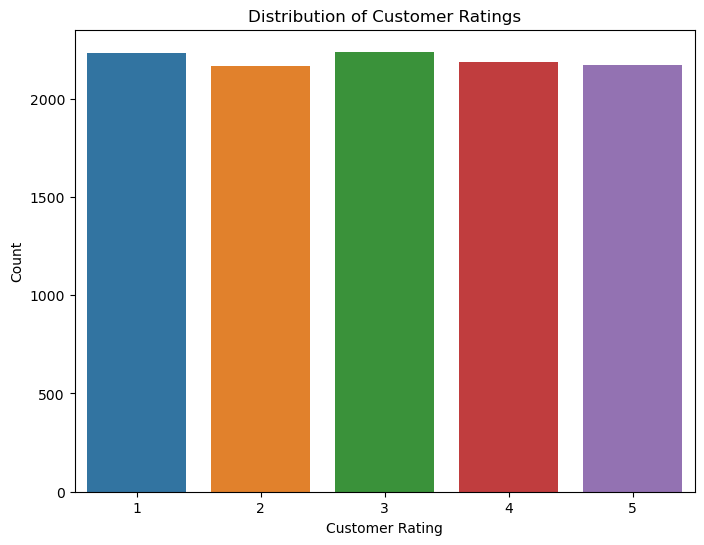

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x='Customer_rating', data=data)
plt.title('Distribution of Customer Ratings')
plt.xlabel('Customer Rating')
plt.ylabel('Count')
plt.show()

In [21]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model building and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer

# Models to try
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [23]:
import os

file_path = os.path.expanduser("~/Desktop/train.csv")
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233            

In [24]:
# Example: Impute missing numerical values with median and categorical with mode
numeric_features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
                    'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
categorical_features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64


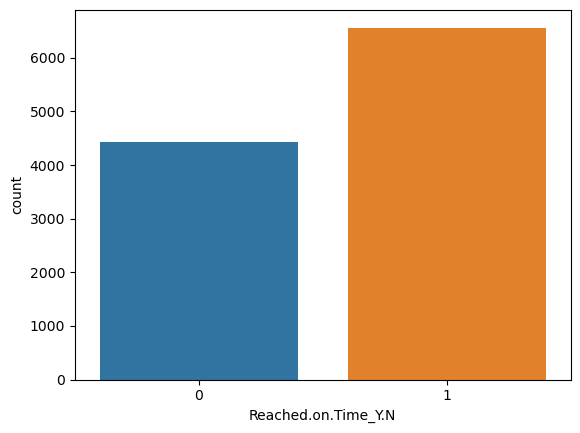

In [25]:
# Define target and features
X = df.drop(['ID', 'Reached.on.Time_Y.N'], axis=1)
y = df['Reached.on.Time_Y.N']

# Check class distribution
print(y.value_counts())
sns.countplot(x=y)
plt.show()


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 8799
Testing samples: 2200


In [27]:

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [28]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['l2']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20],
            'classifier__min_samples_split': [2, 5]
        }
    },
    'Support Vector Machine': {
        'model': SVC(random_state=42, probability=True),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf']
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [5, 10, 15],
            'classifier__weights': ['uniform', 'distance']
        }
    },
    'Gaussian Naive Bayes': {
        'model': GaussianNB(),
        'params': {
            # GaussianNB has limited hyperparameters
        }
    }
}


In [29]:
best_models = {}
for model_name, mp in models.items():
    print(f"Training {model_name}...")
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', mp['model'])
    ])
    
    param_grid = mp['params']
    
    grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_models[model_name] = grid.best_estimator_
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    print(f"Best ROC AUC for {model_name}: {grid.best_score_}\n")


Training Logistic Regression...
Best parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
Best ROC AUC for Logistic Regression: 0.7197698366976659

Training Random Forest...
Best parameters for Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best ROC AUC for Random Forest: 0.7369774103010163

Training Support Vector Machine...
Best parameters for Support Vector Machine: {'classifier__C': 0.1, 'classifier__kernel': 'rbf'}
Best ROC AUC for Support Vector Machine: 0.7292545864751273

Training K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'classifier__n_neighbors': 15, 'classifier__weights': 'distance'}
Best ROC AUC for K-Nearest Neighbors: 0.7203454528771122

Training Gaussian Naive Bayes...
Best parameters for Gaussian Naive Bayes: {}
Best ROC AUC for Gaussian Naive Bayes: 0.7218083216742863



--- Logistic Regression ---
Confusion Matrix:
[[520 367]
 [428 885]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.59      0.57       887
           1       0.71      0.67      0.69      1313

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200

Accuracy: 0.6386
ROC AUC: 0.7183


--- Random Forest ---
Confusion Matrix:
[[621 266]
 [484 829]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.70      0.62       887
           1       0.76      0.63      0.69      1313

    accuracy                           0.66      2200
   macro avg       0.66      0.67      0.66      2200
weighted avg       0.68      0.66      0.66      2200

Accuracy: 0.6591
ROC AUC: 0.7375


--- Support Vector Machine ---
Confusion Matrix:
[[795  92]
 [650 663]]

Classification Report:


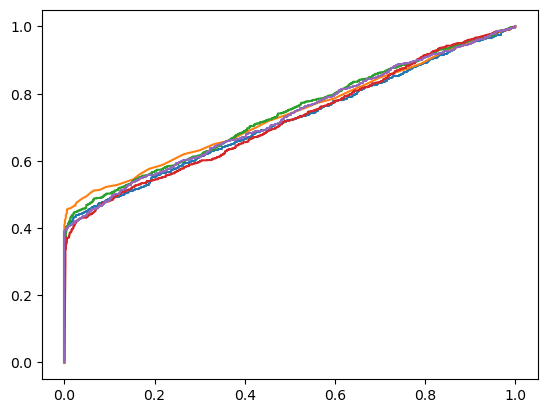

In [30]:
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    
    print(f"--- {model_name} ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    
    if y_proba is not None:
        print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    print("\n")


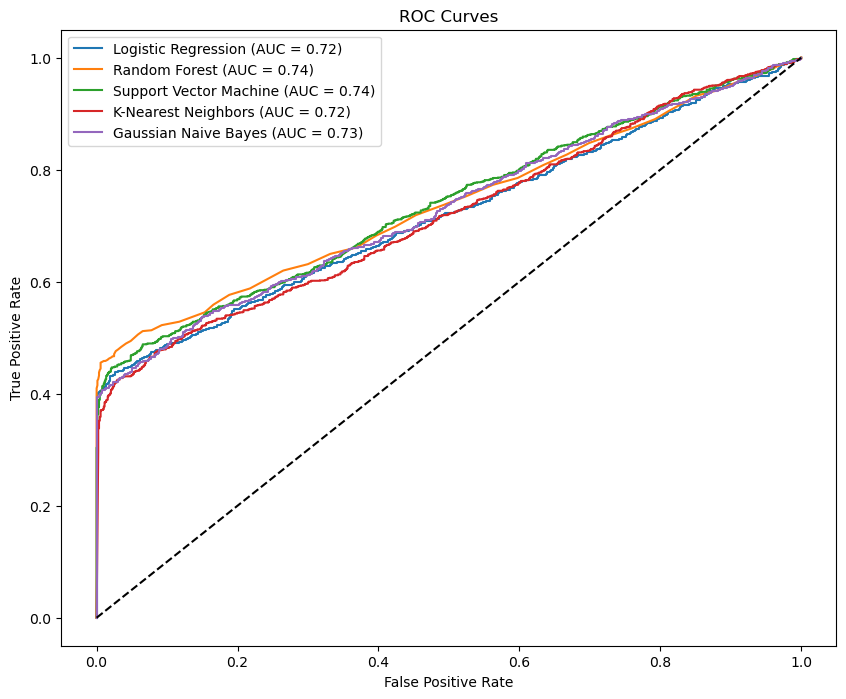

In [31]:
plt.figure(figsize=(10,8))
for model_name, model in best_models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


In [32]:
best_model = best_models['Random Forest']
print("Best Model:", best_model)


Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms']),
                                                 ('cat',
                                                  Pipeline(steps=[(

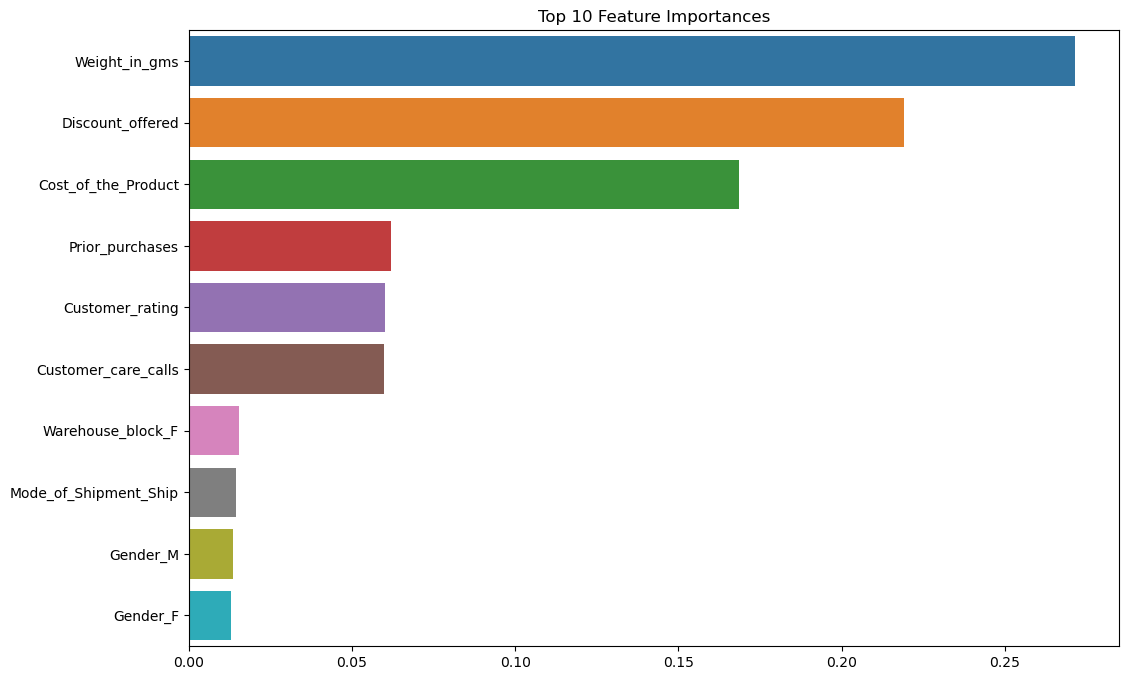

In [33]:
importances = best_model.named_steps['classifier'].feature_importances_
feature_names_num = numeric_features
feature_names_cat = best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([feature_names_num, feature_names_cat])

feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10])
plt.title('Top 10 Feature Importances')
plt.show()


In [34]:
import joblib

# Save the model
joblib.dump(best_model, 'best_model.pkl')

# To load the model later
# loaded_model = joblib.load('best_model.pkl')


['best_model.pkl']